# A little exercise on decision trees

**We'll use generated moon dataset.**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.base import clone

In [2]:
moons = make_moons(n_samples=10000, noise=0.4)

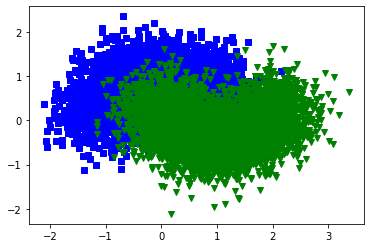

In [3]:
X = moons[0]
y = moons[1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gv')

In [4]:
tree = DecisionTreeClassifier(random_state=42)

param_grid = dict(max_leaf_nodes=np.arange(2, 30))

In [5]:
grid_search = GridSearchCV(tree, param_grid, scoring='accuracy', cv=4)

grid_search.fit(X_train, y_train)

print(f'{grid_search.best_estimator_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_estimator_ = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
grid_search.best_score_ = 0.8573333333333333


In [6]:
best_tree = grid_search.best_estimator_

best_tree.fit(X_train, y_train)

accuracy_score(y_test, best_tree.predict(X_test))

0.8648

**Now let's make some random forest in order to improve our results.**

In [7]:
from sklearn.model_selection import ShuffleSplit

In [8]:
splitter = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

indices = splitter.split(X_train, y_train)

In [9]:
indices = [i[0] for i in indices]
len(indices), len(indices[0])

(1000, 100)

In [10]:
X_split = [X_train[ind] for ind in indices]
y_split = [y_train[ind] for ind in indices]

In [11]:
forest = [clone(best_tree) for _ in range(100)]

for tree, train_set, val_set in zip(forest, X_split, y_split):
    tree.fit(train_set, val_set)

In [12]:
np.mean([accuracy_score(y_test, tree.predict(X_test)) for tree in forest])

0.828136

As we expected, average accuracy when evaluating forest on the test set is slightly lower than before.

In [13]:
from scipy.stats import mode

forest_predictions = []
for test_instance in X_test:
    preds = [tree.predict(np.array([test_instance])) for tree in forest]
    prediction = mode(preds)
    forest_predictions.append(prediction)

In [14]:
forest_predictions_array = np.array([item[0][0][0] for item in forest_predictions])

In [15]:
accuracy_score(y_test, forest_predictions_array)

0.8632

**In the end we reached pretty much the same results using random forest instead of single tree so the ensemble doesn't lead to anything interesting this time.**